In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]
    visited = {start:(0, None)}
    
    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        
        if current_node == goal:
            return current_cost,reconstruct_path(visited, start, goal)

        for neighbor, cost in graph [current_node]:
            total_cost = current_cost + cost
            
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost , current_node)
                heapq.heappush(priority_queue,(total_cost, neighbor))

def reconstruct_path(visited, start, goal):
    path = []
    current = goal
    
    while current is not None:
        path.append(current)
        current = visited[current][1]
        path.reverse()
        return path


def visualize_graph(graph, path = None):
    G = nx.DiGraph()
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight = cost)

    pos = nx.spring_layout(G)
    plt.figure(figsize = (6,4))
    nx.draw(G, pos, with_labels = True, node_color = 'lightblue', node_size = 2000, font_size = 11, font_weight = 'bold', edge_color = 'gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nc.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 12)
    
    if path:
        path_edges = list(zip(path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist = path_edges, edge_color= 'red', width = 1.5)
        plt.title('Uniform Cost Search Path Visualization')
        plt.show()

        graph = {
            'A': [('B',1),('C',4)],
            'B': [('D',1),('E',3)],
            'C': [('F',5)],
            'D': [('G',2)],
            'E': [('G',1)],
            'F': [('G',2)],
            'G': []
        }

start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f'Least cost path from {start_node} to {goal_node}:{'->'.join(path)} with total cost {total_cost}')
    visualize_graph(graph,path)

else:
    print(f'No path found from {start_node} to {goal_node}')

NameError: name 'graph' is not defined

Least cost path from A to G: A -> B -> D -> G with total cost 4


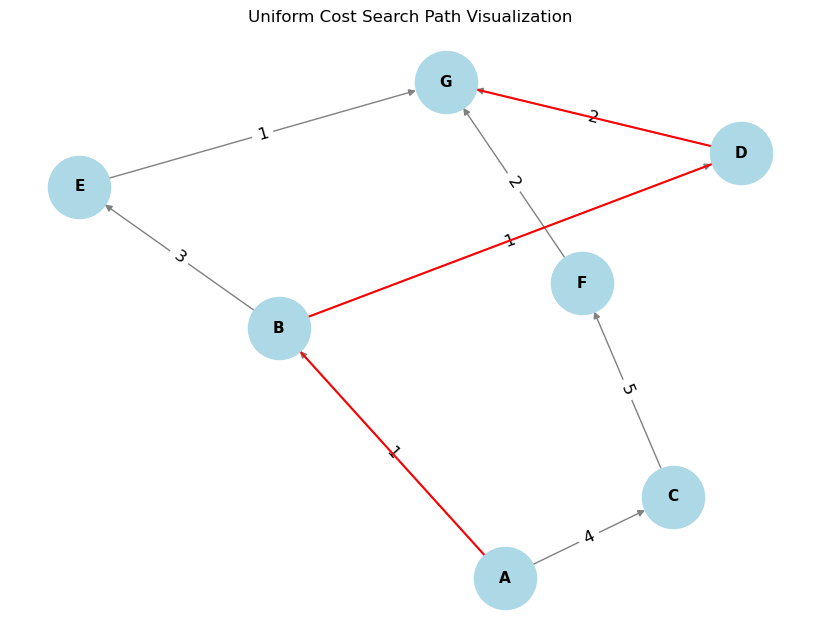

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    
    priority_queue = [(0, start)]

    visited = {start: (0, None)}
    
    while priority_queue:
        
        current_cost, current_node = heapq.heappop(priority_queue)
        
        
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)
        

        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))
    
    
    return None

def reconstruct_path(visited, start, goal):
   
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1] 
    path.reverse()
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()


    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  


    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=11, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    if path:
        
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=1.5)

    plt.title("Uniform Cost Search Path Visualization")
    plt.show()


graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}


start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No path found from {start_node} to {goal_node}")


In [1]:
import heapq
import random
import time
from copy import deepcopy

class Puzzle:
    def __init__(self, state, parent=None, move=None, depth=0, cost=0):
        self.state = state
        self.parent = parent
        self.move = move
        self.depth = depth
        self.cost = cost  # For A*

    def __lt__(self, other):
        return self.cost < other.cost

    def get_blank_position(self):
        for i in range(3):
            for j in range(3):
                if self.state[i][j] == 0:
                    return i, j

    def get_neighbors(self):
        neighbors = []
        x, y = self.get_blank_position()
        moves = [(0, -1, "Left"), (0, 1, "Right"), (-1, 0, "Up"), (1, 0, "Down")]
        for dx, dy, move in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 3 and 0 <= ny < 3:
                new_state = deepcopy(self.state)
                new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
                neighbors.append(Puzzle(new_state, self, move, self.depth + 1))
        return neighbors

    def get_path(self):
        path, node = [], self
        while node:
            path.append(node.move)
            node = node.parent
        return path[::-1]

def heuristic_misplaced_tiles(state, goal):
    return sum(1 for i in range(3) for j in range(3) if state[i][j] and state[i][j] != goal[i][j])

def heuristic_manhattan(state, goal):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                x, y = divmod(state[i][j] - 1, 3)
                distance += abs(x - i) + abs(y - j)
    return distance

def a_star(initial, goal, heuristic):
    start_time = time.time()
    open_list, closed_set = [], set()
    heapq.heappush(open_list, (0, Puzzle(initial)))
    nodes_explored = 0

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_explored += 1

        if current.state == goal:
            return current.get_path(), nodes_explored, time.time() - start_time

        closed_set.add(tuple(map(tuple, current.state)))
        for neighbor in current.get_neighbors():
            if tuple(map(tuple, neighbor.state)) in closed_set:
                continue
            neighbor.cost = neighbor.depth + heuristic(neighbor.state, goal)
            heapq.heappush(open_list, (neighbor.cost, neighbor))

    return None, nodes_explored, time.time() - start_time

def hill_climbing(initial, goal, heuristic, mode="simple"):
    start_time = time.time()
    current = Puzzle(initial)
    nodes_explored = 0
    
    while True:
        if current.state == goal:
            return current.get_path(), nodes_explored, time.time() - start_time

        neighbors = current.get_neighbors()
        nodes_explored += len(neighbors)

        if mode == "steepest":
            best_neighbor = min(neighbors, key=lambda n: heuristic(n.state, goal), default=None)
            if best_neighbor and heuristic(best_neighbor.state, goal) < heuristic(current.state, goal):
                current = best_neighbor
            else:
                break
        elif mode == "stochastic":
            better_neighbors = [n for n in neighbors if heuristic(n.state, goal) < heuristic(current.state, goal)]
            if better_neighbors:
                current = random.choice(better_neighbors)
            else:
                break
        else:  # Simple Hill Climbing
            for neighbor in neighbors:
                if heuristic(neighbor.state, goal) < heuristic(current.state, goal):
                    current = neighbor
                    break
            else:
                break

    return None, nodes_explored, time.time() - start_time

initial_state = [[1, 2, 3], [4, 0, 5], [6, 7, 8]]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

algorithms = {
    "A* (Misplaced Tiles)": lambda: a_star(initial_state, goal_state, heuristic_misplaced_tiles),
    "Simple Hill Climbing": lambda: hill_climbing(initial_state, goal_state, heuristic_misplaced_tiles, "simple"),
    "Steepest Ascent HC": lambda: hill_climbing(initial_state, goal_state, heuristic_misplaced_tiles, "steepest"),
    "Stochastic HC": lambda: hill_climbing(initial_state, goal_state, heuristic_misplaced_tiles, "stochastic"),
}

print("Algorithm | Nodes Explored | Solution Depth | Execution Time (s)")
print("-" * 60)
for name, func in algorithms.items():
    path, nodes, exec_time = func()
    print(f"{name:<25} | {nodes:<15} | {len(path) if path else 'N/A':<14} | {exec_time:.4f}")


Algorithm | Nodes Explored | Solution Depth | Execution Time (s)
------------------------------------------------------------
A* (Misplaced Tiles)      | 318             | 15             | 0.0129
Simple Hill Climbing      | 7               | N/A            | 0.0010
Steepest Ascent HC        | 7               | N/A            | 0.0000
Stochastic HC             | 7               | N/A            | 0.0000
